In [1]:
# Main libraries
import os
import pandas as pd
import numpy as np

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [3]:
# Libraries for recommendation systems
import surprise
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Question 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]

I have unziped and copied the extracted files in same path where my current jupyter notebook file is kept. So while reading .csv files I am not providing path.

In [5]:
review_1 = pd.read_csv('phone_user_review_file_1.csv',encoding='ISO-8859-1')
review_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [6]:
review_2 = pd.read_csv('phone_user_review_file_2.csv',encoding='ISO-8859-1')
review_2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [7]:
review_3 = pd.read_csv('phone_user_review_file_3.csv',encoding='ISO-8859-1')
review_3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [8]:
review_4 = pd.read_csv('phone_user_review_file_4.csv',encoding='ISO-8859-1')
review_4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [9]:
review_5 = pd.read_csv('phone_user_review_file_5.csv',encoding='ISO-8859-1')
review_5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [10]:
review_6 = pd.read_csv('phone_user_review_file_6.csv',encoding='ISO-8859-1')
review_6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [11]:
# printing shape of all df's

print(f'review_1: Rows: {review_1.shape[0]} and Columns: {review_1.shape[1]}\n')
print(f'review_2: Rows: {review_2.shape[0]} and Columns: {review_2.shape[1]}\n')
print(f'review_3: Rows: {review_3.shape[0]} and Columns: {review_3.shape[1]}\n')
print(f'review_4: Rows: {review_4.shape[0]} and Columns: {review_4.shape[1]}\n')
print(f'review_5: Rows: {review_5.shape[0]} and Columns: {review_5.shape[1]}\n')
print(f'review_6: Rows: {review_6.shape[0]} and Columns: {review_6.shape[1]}\n')
print(f'Total rows: {review_1.shape[0]+review_2.shape[0]+review_3.shape[0]+review_4.shape[0]+review_5.shape[0]+review_6.shape[0]}')

review_1: Rows: 374910 and Columns: 11

review_2: Rows: 114925 and Columns: 11

review_3: Rows: 312961 and Columns: 11

review_4: Rows: 98284 and Columns: 11

review_5: Rows: 350216 and Columns: 11

review_6: Rows: 163837 and Columns: 11

Total rows: 1415133


In [12]:
# Checking that column names of all 6 dataframes are same or different

print('Check whether the column names are same in all the dataframes: ')
all(np.unique(review_1.columns.tolist()) == np.unique(review_1.columns.tolist()+
                                                      review_2.columns.tolist()+
                                                      review_3.columns.tolist()+
                                                      review_4.columns.tolist()+
                                                      review_5.columns.tolist()+
                                                      review_6.columns.tolist()))

Check whether the column names are same in all the dataframes: 


True

# Question 1 - A. Merge all the provided CSVs into one dataFrame. [2 Marks]

In [13]:
#Merge the data into a single dataframe 
reviews = pd.concat([review_1,review_2,review_3,review_4,review_5,review_6], ignore_index=True)
del review_1, review_2, review_3, review_4, review_5, review_6
print(f'reviews: Rows: {reviews.shape[0]} and Columns: {reviews.shape[1]}\n')
print('Top 5 rows of the data: ')
display(reviews.head())
print('Bottom 5 rows of the data: ')
display(reviews.tail())

reviews: Rows: 1415133 and Columns: 11

Top 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


Bottom 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


#  Question 1 - B. Explore, understand the Data and share at least 2 observations. [2 Marks]

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


In [15]:
reviews.shape

(1415133, 11)

In [16]:
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


Observations : 
    
    i) Except score and score_max (which are of float type) all other features are of object type
    ii) feature date should be of datetype
    iii) Also, score, score_max, extract and author: columns seems to have Null values
    iv) lang should be string as language can be English,Frech,German , Hindi etc

 # Basic analysis

In [17]:
df=reviews.isna().sum().round(2)
df1 = (df*100/reviews.shape[0]).round(2)
print('Missing count and percentages for each column are: \n',df.astype('str') +' ('+ df1.astype('str')+'%)')

Missing count and percentages for each column are: 
 phone_url         0 (0.0%)
date              0 (0.0%)
lang              0 (0.0%)
country           0 (0.0%)
source            0 (0.0%)
domain            0 (0.0%)
score        63489 (4.49%)
score_max    63489 (4.49%)
extract      19361 (1.37%)
author       63202 (4.47%)
product           1 (0.0%)
dtype: object


Thus these three features have approx 4.5% missing values 'score' and 'score_max' have exactly same number of missing values

In [18]:
print('Number of unique values in each feature: \n',reviews.nunique())

Number of unique values in each feature: 
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


That is score_max for all the phones is 10 throughout.

In [19]:
# Top 10 Non-english users
reviews[reviews['lang']!='en']['author'].value_counts(ascending=False)[:10]

Cliente Amazon        19276
e-bit                  8663
Client d'Amazon        7613
Amazon Kunde           4735
Amazon Customer        2713
einer Kundin           2610
einem Kunden           1898
unknown                1718
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1070
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64

In [20]:
# Top 10 Non-english products
reviews[reviews['lang']!='en']['product'].value_counts(ascending=False)[:10]

Huawei P8lite zwart / 16 GB                                                                                                                                                                  2707
Samsung Galaxy Express I8730                                                                                                                                                                 2686
Samsung Galaxy S6 zwart / 32 GB                                                                                                                                                              2345
Nokia 5800 XpressMusic                                                                                                                                                                       1996
Nokia N95                                                                                                                                                                                    1848
Huawei P9 Lite Smartphone, LTE

Thus, a multiple similar names, with different details exist in product list. For eg:

 - Huawei P8lite zwart / 16 GB and
 - Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]
   are exactly same models

Another observation is that 'phone_url' column also contains the phone name and model information. Let's check what extra information is present in 'product column'

In [21]:
# print the frequency count of phone_url column
reviews['phone_url'].value_counts(ascending=False).head(50)

/cellphones/samsung-galaxy-s-iii/                                 17093
/cellphones/apple-iphone-5s/                                      16379
/cellphones/samsung-galaxy-s6/                                    16145
/cellphones/samsung-galaxy-s5/                                    16082
/cellphones/samsung-galaxy-s7-edge/                               15917
/cellphones/motorola-moto-g/                                      14476
/cellphones/samsung-galaxy-s7-789999/                             13488
/cellphones/samsung-i9500-galaxy-s-iv/                            13161
/cellphones/huawei-p8-lite/                                       12629
/cellphones/lenovo-vibe-k4-note/                                   9662
/cellphones/samsung-galaxy-s4-mini-gt-i9190-gt-i9192-dual-sim/     9027
/cellphones/samsung-galaxy-s6-edge-sm-g925f/                       8844
/cellphones/apple-iphone-4s/                                       8602
/cellphones/samsung-galaxy-s3-mini/                             

In [22]:
# frequency count of 'product' column for 'samsung-galaxy-s-iii' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s-iii/'][['product']].value_counts().head(15)

product                                                                                                                                         
Samsung Galaxy Express I8730                                                                                                                        2685
Samsung Galaxy S III 16GB (Virgin Mobile)                                                                                                            730
Samsung Galaxy S III                                                                                                                                 689
Samsung Galaxy S III 16GB (Straight Talk)                                                                                                            556
Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz     381
Samsung Galaxy S III 16GB (Boost Mobile)                                                  

Extra information is generally:

phone memory: 8Gb/16GB/32GB etc
phone colour: Marble white, Blue, Red etc
carrier: AT&T, Verizon etc
Another observation is that these specifications are not present in all the product names, for eg: there is no-way available to differentiate between the 2 products below:
'Samsung Galaxy S III Cellular Phone' and
'Samsung Galaxy S III SPH-L710 - 16GB - Marble White (Sprint) Smartphone'

Thus differentiating information is not same in all the product details. Also, the goal is to recommend a phone not the carrier. and other specs like color etc are of low importance in recommendation. The only consistent differentiating information in all the product names is the 'phone manufacturer and model number', which can also be extracted from 'phone_url' column. Let's check for other phone names as well

In [23]:
# frequency count of 'product' column for 'apple-iphone-5s' type phone
reviews[reviews["phone_url"]=='/cellphones/apple-iphone-5s/'][['product']].value_counts().head(15)

product                                                                          
Apple iPhone 5s (Silver, 16GB)                                                       1603
Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹)                                        1355
Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray                            1273
Apple iPhone 5s (Gold, 16GB)                                                          682
Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ)                                        592
iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED                                        434
Apple iPhone 5S (Silver, 16 GB)                                                       429
Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey                               349
Apple iPhone 5S 16Gb                                                                  326
Sim Free Apple iPhone 5S 16GB Mobile Phone - Silver                                   286
Apple iPhone 5s 16

In [24]:
# frequency count of 'product' column for 'samsung-galaxy-s6' type phone

reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s6/'][['product']].value_counts().head(15)

product                                                                                                                             
Samsung Galaxy S6 zwart / 32 GB                                                                                                         2345
Samsung Galaxy S6 32GB (AT&T)                                                                                                            979
Samsung Galaxy S6 32GB (Sprint)                                                                                                          935
Samsung Galaxy S6 32GB (Verizon)                                                                                                         919
Samsung Galaxy S6 wit / 32 GB                                                                                                            801
Samsung Galaxy S6 32GB (T-Mobile)                                                                                                        736
Samsung Galaxy S6    

In [25]:
# frequency count of 'product' column for 'samsung-galaxy-s5' type phone

reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s5/'][['product']].value_counts().head(15)

product                                                                                                   
Samsung Galaxy S5 16GB (Verizon)                                                                              1432
Samsung Galaxy S5 16GB (T-Mobile)                                                                             1165
Samsung Galaxy S5 16GB (AT&T)                                                                                 1079
Smartphone Samsung Galaxy S5 SM-G900                                                                           671
Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue     664
Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile)                                            513
Samsung Galaxy S5 goud / 16 GB                                                                                 480
Samsung Galaxy S5 16GB (Sprint)                                                         

As can be seen, same pattern is visible for the most common types of phones. Thus it is better to use phone name and model number rather than other details mentioned in 'product' column

In [26]:
reviews['phone'] = reviews['phone_url'].str.split("/").apply(lambda col: col[2]).replace('-', ' ', regex=True)
reviews['product'] = reviews['phone']
reviews['phone'].unique()

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', ..., 'siemens c10', 'maxon mx 3204',
       'alcatel ot club_1187'], dtype=object)

In [27]:
reviews['product'].shape

(1415133,)

Distribution of number of ratings per item (Clipped at 10): 
 samsung galaxy s iii         17093
apple iphone 5s              16379
samsung galaxy s6            16145
samsung galaxy s5            16082
samsung galaxy s7 edge       15917
motorola moto g              14476
samsung galaxy s7 789999     13488
samsung i9500 galaxy s iv    13161
huawei p8 lite               12629
lenovo vibe k4 note           9662
Name: product, dtype: int64


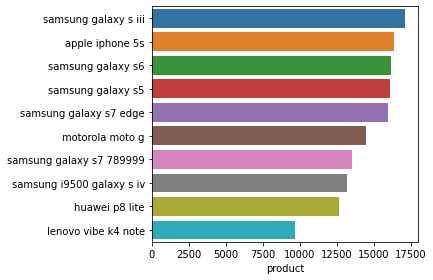

In [28]:
product = reviews['product'].value_counts()[:10]
print('Distribution of number of ratings per item (Clipped at 10): \n',product)
sns.barplot(y=product.index,x=product)
plt.tight_layout()
plt.show()

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    76978
NaN                63202
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Anonymous           2750
einer Kundin        2610
einem Kunden        1898
unknown             1738
Name: author, dtype: int64


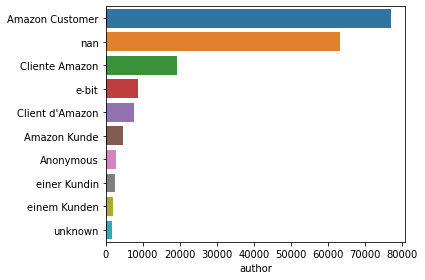

In [29]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

Following observations are made:

Most active user is 'Amazon customer'
'Anonymous' and 'unknown' users are those whose names are not known. Thus we can use this to impute blank values in 'author' column
Many names are similar but in different languages like 'Amazon customer' and 'Cliente Amazon'. Let's search for these first and cleanup the differences due to language
names like 'einer Kundin', 'einem Kunden','Anonymous' and 'unknown' can be interpreted in the same way i.e. an 'unknown customer'. Let's replace these names too

In [30]:
unknowns = ['Anonymous','einer Kundin','einem Kunden', 'unknown','Anonymous ']
reviews['author'].replace(to_replace = unknowns, 
                          value = 'Anonymous', 
                          inplace=True)

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer       76978
NaN                   63202
Cliente Amazon        19304
Anonymous             10457
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64


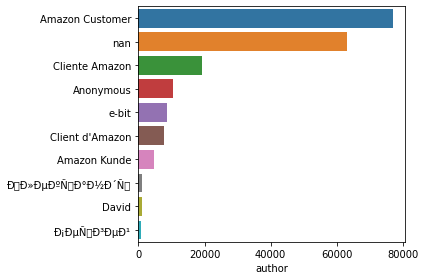

In [31]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

In [32]:
# Let's check the score column of the data
print('Uniqe values in the "score" feature: \n',reviews.score.unique())

Uniqe values in the "score" feature: 
 [10.   6.   9.2  4.   8.   2.   9.6  7.2  6.8  9.   8.3  8.8  8.4  5.3
  7.   6.4  7.6  nan  5.2  3.2  4.4  2.8  5.6  3.6  4.8  1.   5.   3.
  2.4  9.3  8.5  9.5  6.5  5.5  9.8  8.2  8.6  7.8  9.4  6.6  6.2  7.5
  9.9  2.7  8.7  6.7  3.3  7.7  7.3  9.7  6.3  7.4  5.7  4.7  4.3  5.8
  4.2  4.5  2.2  5.4  7.9  3.5  4.6  3.7  2.5  3.4  7.1  8.1  1.2  1.4
  3.8  9.1  2.6  1.6  1.7  1.5  1.8  2.3  6.1  5.9  1.3  0.2  0.4  8.9
  6.9  0.6  4.9]


# C. Round off scores to the nearest integers. [3 Marks]
# G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

Let's round it off to nearest integer

In [33]:
# Dropping irrelevent features and keeping just Author, product and score

relevant_features=['author','product','score']
# irrelvant_features=['phone_url','date','lang','country','source','domain','score_max','extract']

In [34]:
print('Number of duplicate rows: ', reviews.duplicated().sum())

Number of duplicate rows:  24877


In [35]:
orgnl_rows = reviews.shape[0]
orgnl_columns = reviews.shape[1]

#   D. Check for missing values. Impute the missing values, if any. [2 Marks]
#   E. Check for duplicate values and remove them, if any. [2 Marks]

In [36]:
revs1 = reviews.copy()

# Delete data which is not useful anymore, to save memory
del reviews

# Step1: remove irrelevant features
revs1 = revs1.loc[:,relevant_features]
print(f'Step1: revs1 Shape after removing irrelevant features: Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

# Step2: Round-off score feature to nearest integer
revs1['score'] = revs1['score'].round(0).astype('Int64')
print('Step2: Round-off: Unique values in the "score" feature(after rounding-off): \n',list(revs1.score.unique()))

# Step3: Impute missing values in score feature with median
revs1['score'] = revs1['score'].fillna(revs1['score'].median())
print('\nStep3: Imputation of "score"  with median and "author" with "Anonymous"')

# Step4: remove samples with missing values in 'Product' and 'author' feature and also 'Anonymous' values
revs1.dropna(inplace=True)
revs1 = revs1[revs1["author"] != 'Anonymous']
print(f'\nStep4: revs1 Shape(after removing missing values): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

# Step5: remove duplicates, if any
revs1 = revs1.drop_duplicates()
print(f'Step5: revs1 Shape(after removing duplicates): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

print(f'Overall {round(100 - revs1.shape[0]*100/orgnl_rows,2)}% samples are dropped\n')
revs1.head()

Step1: revs1 Shape after removing irrelevant features: Rows: 1415133 and Columns: 3

Step2: Round-off: Unique values in the "score" feature(after rounding-off): 
 [10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]

Step3: Imputation of "score"  with median and "author" with "Anonymous"

Step4: revs1 Shape(after removing missing values): Rows: 1341474 and Columns: 3

Step5: revs1 Shape(after removing duplicates): Rows: 1154026 and Columns: 3

Overall 18.45% samples are dropped



,author,product,score
0,CarolAnn35,samsung galaxy s8,10
1,james0923,samsung galaxy s8,10
2,R. Craig,samsung galaxy s8,6
3,Buster2020,samsung galaxy s8,9
4,S Ate Mine,samsung galaxy s8,4


# F. Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [37]:
# separate 1 million data samples
revs_1m = revs1.sample(n=1000000, random_state=612)
print(f'revs2 Shape: Rows: {revs_1m.shape[0]} and Columns: {revs_1m.shape[1]}\n')

revs2 Shape: Rows: 1000000 and Columns: 3



# 2. Answer the following questions. [10 Marks]
#    A. Identify the most rated products. [3 Marks]

In [38]:
# 1. Most rated features
print('Most rated features/products: \n\n',revs_1m['product'].value_counts().head())

Most rated features/products: 

 samsung galaxy s5         11429
samsung galaxy s6         11046
motorola moto g           10382
samsung galaxy s7 edge    10359
apple iphone 5s           10281
Name: product, dtype: int64


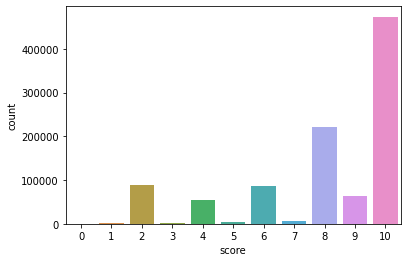

In [39]:
# find out which rating is given highest number of times
sns.countplot(data=revs_1m , x='score')
plt.show()

In [40]:
revs1[revs1['score']==10]['author'].value_counts().head(10)

Amazon Customer    1530
Cliente Amazon      519
Amazon Kunde        422
Client d'Amazon     301
David               292
Alex                274
Daniel              258
Marco               229
Chris               228
Michael             210
Name: author, dtype: int64

# B. Identify the users with most number of reviews. [3 Marks]

In [41]:
print('Users with highest number of reviews: \n\n',revs_1m['author'].value_counts().head())

Users with highest number of reviews: 

 Amazon Customer    4816
Cliente Amazon     1663
Amazon Kunde       1179
Client d'Amazon     975
David               558
Name: author, dtype: int64


# C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]

In [42]:
author50 = revs1['author'].value_counts()
author50 = author50[author50>50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given >50 rating: ', len(author50))

product50 = revs1['product'].value_counts()
product50 = product50[product50>50].index.tolist() # list of products with > 50 ratings
print('Number of products with >50 rating: ', len(product50))

revs_50 = revs1[(revs1['author'].isin(author50)) & (revs1['product'].isin(product50))]
print(f'\nrevs_50: Rows: {revs_50.shape[0]} and Columns: {revs_50.shape[1]}\n')
del author50, product50

revs_50.head()

Number of authors who have given >50 rating:  805
Number of products with >50 rating:  2496

revs_50: Rows: 95672 and Columns: 3



,author,product,score
66,James,samsung galaxy s8,10
161,Paul,samsung galaxy s8,10
167,Robert,samsung galaxy s8,10
179,Michelle,samsung galaxy s8,10
225,Andrew,samsung galaxy s8,10


In [43]:
revs_50['author'].unique()[:100]

array(['James', 'Paul', 'Robert', 'Michelle', 'Andrew', 'Ralf',
       'Ð\x90Ð½Ð°Ñ\x82Ð¾Ð»Ð¸Ð¹', 'alessandro', 'Roberto',
       'Ð\x95Ð³Ð¾Ñ\x80', 'Ð\x92Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ\x80',
       'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Michael',
       'Marco', 'Jan', 'Hans', 'Kim', 'Stefan', 'Nick', 'AndrÃ©', 'Kelly',
       'Manuel', 'Danilo', 'Ð\x9dÐ°Ð´ÐµÐ¶Ð´Ð°', 'Ð\x98Ð³Ð¾Ñ\x80Ñ\x8c',
       'Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', 'alex', 'Julien', "Client d'Amazon",
       'Client Amazon', 'Carlos', 'David', 'William', 'Amazon Customer',
       'Kindle Customer', 'bob', 'Gabriel', 'Denis', 'Sara', 'Dennis',
       'Fabian', 'MS', 'Jim', 'anonymous', 'Peter', 'Juan', 'Daniel',
       'Victor', 'Amber', 'Jennifer', 'Joseph', 'Ann', 'claudia', 'Mike',
       'Adam', 'Melanie', 'Adrian', 'mike', 'jose', 'Christine', 'JC',
       'Sam', 'juan', 'Lee', 'Carla', 'Steve', 'Marina', 'Samuel', 'Jay',
       'Scott', 'Cliente Amazon', 'Amazon Kunde', 'Lorenzo', 'Pseudonym',
       'Chiara', 'Simone', 'Paulo', 'G

In [44]:
revs_50['product'].unique()[:100]

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', 'samsung galaxy s7 edge',
       'apple iphone 6s plus', 'samsung galaxy s7 789999',
       'apple iphone 7 plus', 'apple iphone 6s', 'huawei honor 7',
       'apple iphone 7', 'huawei ascend mate 8', 'xiaomi redmi 3',
       'apple iphone se', 'huawei p9 plus', 'htc 10', 'huawei honor 8',
       'huawei p9 lite', 'huawei mate 9', 'oneplus 3',
       'samsung galaxy s6 edge sm g925f', 'lg v10', 'google nexus 6p',
       'huawei p9 797082', 'samsung galaxy a5 2017',
       'samsung galaxy j5 4g lte 5 2 inches', 'samsung galaxy s6',
       'huawei p10', 'sony xperia xz', 'huawei p8', 'oneplus 3t',
       'samsung galaxy note 5 sm n920f', 'zte axon 7',
       'motorola moto x play', 'lg k10', 'samsung galaxy j5',
       'samsung galaxy a3 819970', 'samsung galaxy j3 duos',
       'xiaomi mi 5', 'asus zenfone 3', 'motorola moto z play',
       'vodafone smart ultra 6', 'samsung galaxy a5 2016',
     

# Question 3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

In [45]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [46]:
# Using the data from the most popular phones amongst the most frequent users
popularity_rec(revs_50)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
samsung e1120,10.0,4
zte v987,10.0,4
lenovo p700i,10.0,2
lg kf700,10.0,2
motorola mpx200,10.0,2


In [47]:
# if we consider the original data (excluding 'Anonymous' users)
popularity_rec(revs1)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
verykool t742,10.0,8
supersonic sc 150,10.0,6
verykool s505,10.0,5
vodafone smart 4 power,10.0,5
mitsubishi trium mondo,10.0,4


# Question 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch youcan limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]

Initially building Collaborative filtering model using SVD

# 4.1  Collaborative filtering model using SVD 

In [48]:
# Rearrange columns for SVD and prepare train and testsets
revs50_ = Dataset.load_from_df(revs_50[['author','product','score']], Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(revs50_, test_size=.25,random_state=612)

print('top 3 values from trainset: \n')
for key,value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'-> ',value,'\n')
print('\ntop 3 values from testset: ', *testset[0:3], sep='\n\n')

top 3 values from trainset: 

0 ->  [(0, 10.0), (59, 10.0), (166, 10.0), (240, 8.0), (367, 8.0), (437, 8.0), (476, 4.0), (650, 9.0), (360, 4.0), (5, 10.0), (697, 10.0), (232, 8.0), (104, 8.0), (580, 10.0), (451, 10.0), (289, 10.0), (392, 10.0), (860, 10.0), (67, 8.0), (562, 10.0), (110, 10.0), (946, 10.0), (12, 2.0), (66, 4.0), (77, 8.0), (400, 4.0), (1436, 10.0), (233, 6.0), (576, 10.0), (913, 8.0), (73, 7.0), (64, 10.0), (235, 10.0), (18, 10.0), (1424, 8.0), (675, 10.0), (671, 8.0), (87, 10.0), (353, 10.0), (544, 10.0), (10, 4.0), (140, 2.0), (369, 10.0), (1, 8.0), (1062, 10.0), (1395, 8.0), (29, 8.0), (132, 8.0), (291, 10.0), (209, 2.0), (14, 8.0), (365, 8.0), (15, 8.0), (684, 8.0), (112, 4.0), (550, 10.0), (531, 10.0), (568, 10.0), (1304, 8.0), (1797, 5.0), (193, 10.0), (562, 8.0), (1439, 10.0), (33, 8.0), (1, 10.0), (1459, 2.0), (826, 10.0), (298, 10.0), (467, 4.0), (80, 8.0), (47, 2.0), (132, 6.0), (246, 2.0), (1460, 4.0), (697, 4.0), (246, 10.0), (750, 8.0), (1932, 4.0), (359, 1

In [49]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [50]:
%%time
# fit and predict using svd
def svd_func(train, test):
    svd = SVD(random_state=612)
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

svd_pred, svd = svd_func(trainset,testset)
print('First few prediction values: \n',svd_pred[0:2])
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n') # compute RMSE
svd_rmse = round(accuracy.rmse(svd_pred),2)

First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.402297877026315, details={'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=10, details={'was_impossible': False})]
RMSE: 2.9677

RMSE value(test-set):  2.97 

RMSE: 2.9677
Wall time: 4.9 s


# 4.2. Collaborative filtering model using kNNWithMeans_Item based

In [51]:
%%time
# fit and predict using knn
def knn_item(train, test):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train)
    knn_i_pred = knn_i.test(test)
    return knn_i_pred, knn_i

knn_i_pred, knn_i = knn_item(trainset, testset)
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n') # compute RMSE
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.574967294731438, details={'actual_k': 50, 'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=7.662700041435039, details={'actual_k': 42, 'was_impossible': False})]
RMSE: 2.8640

RMSE value(Item-based Model, test-set):  2.86 

RMSE: 2.8640
Wall time: 12.9 s


# 4.3. Collaborative filtering model using kNNWithMeans_User based 

In [52]:
%%time
# fit and predict using knn
def knn_user(train, test):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train)
    knn_u_pred = knn_u.test(test)
    return knn_u_pred, knn_u

knn_u_pred, knn_u = knn_user(trainset, testset)
print('First few prediction values: \n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n') # compute RMSE
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.553314340337794, details={'actual_k': 26, 'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=8.232029093896774, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.9002

RMSE value(User-based Model, test-set):  2.9 

RMSE: 2.9002
Wall time: 6.16 s


# Question 5. Evaluate the collaborative model. Print RMSE value. [2 Marks]


RMSE value(SVD-based Model, test-set):  2.97

RMSE value(Item-based Model, test-set):  2.86

RMSE value(User-based Model, test-set):  2.9


<AxesSubplot:>

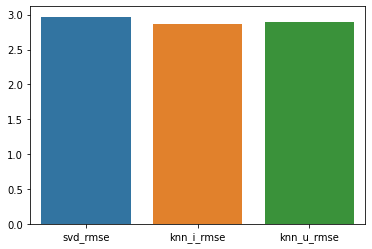

In [66]:
# Comparison of RMSE scores from different collaorative algorithms

print('\nRMSE value(SVD-based Model, test-set): ', svd_rmse)
print('\nRMSE value(Item-based Model, test-set): ', knn_i_rmse)
print('\nRMSE value(User-based Model, test-set): ', knn_u_rmse) 

sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse])

 Best RMSE score is given by SVD based, so let us use it for further analysis

# Question 6. Predict score (average rating) for test users. [2 Marks]

In [54]:
# Average ratings of collaborative filtering using SVD 

svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  7.800217805179583
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.3044087829916013


In [55]:
# Average rating of Collaborative filtering model using kNNWithMeans_Item Based

knn_i_pred_df=pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_i_pred_df['est'].mean())
print('average rating  by test users: ',knn_i_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_i_pred_df['rui']-knn_i_pred_df['est']).abs().mean())

average prediction for test users:  7.760249631382037
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.252437466152665


In [56]:
# Average rating of Collaborative filtering model using kNNWithMeans_User based 

knn_u_pred_df=pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_u_pred_df['est'].mean())
print('average rating  by test users: ',knn_u_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_u_pred_df['rui']-knn_u_pred_df['est']).abs().mean())

average prediction for test users:  7.787064696309136
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.2535722447411337


# Question 7. Report your findings and inferences. [2 Marks]

1. Most popular phone (rated 10 by highest number of people):
     * Overall: verykool t742
     * Amongst top users: samsung e1120       
2. Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.
3. Most of the authors have given the rating of '10' or '8'
4. Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE

# Question 8. Try and recommend top 5 products for test users. [5 Marks]

In [67]:
%%time
#recommend top 5 products for test users
top_5 = get_top_n(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users


Top 5 recommendations for all test users are: 

Luca ->  [('huawei p8 lite 2017', 9.54580999682166), ('motorola c975', 9.355991319296889), ('huawei ascend mate 7', 9.338604166135665), ('huawei ascend mate', 9.335522032799714), ('huawei g610', 9.236829921101211)] 

Andre ->  [('motorola moto g', 9.403306327732883), ('nokia 1200', 8.533290535169897), ('samsung gt b2100', 8.499674037906336), ('samsung galaxy s iii neo i9300i', 8.166709202945546), ('huawei ascend p1', 8.064538546389953)] 

Samuel ->  [('htc first', 10), ('lg g2 594708', 9.716274423343407), ('blackberry passport', 9.431273565204009), ('samsung sgh e635 sgh e630', 9.319522951000842), ('lg d686 g pro lite dual', 8.989221846729466)] 

Cliente Amazon ->  [('lg k500n', 10), ('huawei nova', 9.641332610208144), ('huawei shotx', 9.563625646324985), ('samsung s5611', 9.111330722972106), ('htc desire eye m910x', 9.056065934146138)] 

Barbara ->  [('lg dare vx9700', 10), ('alcatel one touch idol 2 mini', 9.82098153007786), ('motorola 

Marcel ->  [('doro phoneeasy 610gsm', 9.40993354326751), ('mobistel cynus t2', 9.28306713652825), ('motorola rokr z6', 8.691277052272229), ('huawei p8 lite', 8.606342209015738), ('htc sensation xl', 8.569587418859603)] 

Anna ->  [('samsung galaxy a3 2016', 9.311113252056362), ('alcatel onetouch pop 3 5015d', 9.29516135353755), ('samsung galaxy grand neo plus gt i9060i', 9.257136888266727), ('nokia 6700 slide', 9.105792080540935), ('sony xperia x compact', 9.063336578214326)] 

Melissa ->  [('lg env', 9.612245083607782), ('lg optimus net', 9.367519801820414), ('samsung galaxy s4 zoom', 9.023802339976914), ('samsung galaxy s4 zoom', 9.023802339976914), ('samsung galaxy s i9000', 8.558188387334157)] 

lorenzo ->  [('google nexus 6p', 9.525485365678591), ('microsoft lumia 640 dual sim', 9.48483528599049), ('meizu m2 note', 8.669515205926455), ('samsung galaxy a5', 8.415338746264268), ('doogee homtom ht7', 8.24973406985952)] 

Bryan ->  [('samsung galaxy s6 edge sm g925f', 9.49007519165143

In [69]:
%%time
#recommend top 5 products for test users for user based model

top_5 = get_top_n(knn_u_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users

Top 5 recommendations for all test users are: 

Luca ->  [('jolla jolla phone', 10), ('motorola moto x 1 moto x1 moto x 2nd gen', 9.797954973396047), ('motorola c975', 9.54876834233821), ('apple iphone 6s', 9.456635081464311), ('huawei p8 lite 2017', 9.387280504866801)] 

Andre ->  [('blackberry z3', 9.421374882432653), ('nokia 1200', 9.263432870923426), ('motorola moto g', 8.786528138079325), ('huawei ascend p1', 8.502360863934305), ('blackberry q10', 8.281567729928566)] 

Samuel ->  [('blackberry passport', 10), ('lg g2 594708', 9.779140517431955), ('sony ericsson xperia mini', 9.463685315122481), ('htc first', 9.288578486849445), ('lg k4', 9.147204961350475)] 

Cliente Amazon ->  [('leagoo lead 5', 9.914009196432842), ('lg k500n', 9.907667948753803), ('huawei shotx', 9.787086442284869), ('htc desire eye m910x', 9.717575034380296), ('huawei nova', 9.590386857023988)] 

Barbara ->  [('alcatel one touch idol 2 mini', 10), ('lg dare vx9700', 9.954836278364562), ('huawei y635', 9.3301823

Pietro ->  [('huawei p9 plus', 9.765491253138277), ('lg g2 594708', 9.572572386313805), ('samsung ativ s', 9.529919422047216), ('samsung galaxy s7 edge', 9.44378720855677), ('samsung galaxy s6 edge sm g925f', 9.285938863361293)] 

Jean ->  [('motorola razr i', 8.808225079758172), ('samsung galaxy a5 2016', 8.797899150948277), ('samsung champ gt c3300k', 8.78937789536172), ('doro phoneeasy 612', 8.653989813986431), ('asus zenfone 2 ze551ml', 8.379611887878525)] 

ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½ ->  [('samsung galaxy note 2', 9.78176977991105), ('samsung galaxy a5 2016', 9.581214237832533), ('apple iphone 6s plus', 9.538265411545758), ('huawei honor 2', 9.316675378997939), ('nokia 206', 9.260399601937328)] 

Anne ->  [('sony ericsson k510i', 10), ('sony ericsson xperia x10 mini pro', 8.999211289579856), ('htc desire z', 8.997043571252567), ('sony xperia m', 8.770860408754848), ('huawei p8', 8.60909473661832)] 

kuzeykizi ->  [('samsung omnia ii i8000', 9.058778342873177), ('samsung d900', 9.0456060

In [70]:
%%time
#recommend top 5 products for test users for SVD based model

top_5 = get_top_n(svd_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users

Top 5 recommendations for all test users are: 

Luca ->  [('apple iphone 5', 10), ('samsung galaxy ace style', 10), ('nokia c2 01', 10), ('apple iphone 4s', 10), ('nokia lumia 920', 10)] 

Andre ->  [('asus zenfone 2 ze551ml', 10), ('microsoft lumia 950 xl', 10), ('samsung galaxy s6', 9.88865856483012), ('nokia lumia 830', 9.623107351899606), ('samsung gt b2100', 9.041133372443163)] 

Samuel ->  [('lg g2 594708', 10), ('blackberry passport', 9.906651462057834), ('samsung sgh e635 sgh e630', 9.587620903862991), ('sony ericsson xperia mini', 9.316862685214351), ('lg g3 d855 657484', 9.182192451578775)] 

Cliente Amazon ->  [('samsung galaxy s duos s7562', 9.470021476831011), ('samsung galaxy s duos s7562', 9.470021476831011), ('lg k500n', 9.336709913426361), ('sony xperia z1', 9.260472972834137), ('sony xperia z1', 9.260472972834137)] 

Barbara ->  [('huawei ascend mate 7', 10), ('huawei y635', 9.81786748828621), ('samsung galaxy s5', 9.754637591734188), ('lg dare vx9700', 9.508150738620

Jose Antonio ->  [('bq aquaris e5', 9.239678775342071), ('huawei p8', 9.069099547598915), ('sony xperia z2', 8.955143682830291), ('huawei honor 6', 8.895484238193546), ('samsung galaxy a5', 8.723299927070736)] 

Ð Ð¾Ð¼Ð°Ð½ ->  [('sony xperia z1', 9.548821069052186), ('sony xperia z1', 9.548821069052186), ('nokia 6303i', 9.484384206906036), ('lg g3 d855 657484', 9.422680463454025), ('asus zenfone 3', 9.397184310703187)] 

Manuela ->  [('apple iphone 6s plus', 10), ('wiko fever', 10), ('apple iphone 5s', 9.981176384484437), ('asus zenfone 2', 9.950478085015499), ('apple iphone 5', 9.81626064051891)] 

laura ->  [('lg g2 594708', 10), ('caterpillar b25', 9.37582323220883), ('samsung galaxy mini 2 s6500', 9.242664448094347), ('samsung galaxy ace s5830', 9.109902458290389), ('samsung galaxy s6', 9.083777412214404)] 

Vincent ->  [('huawei p9 lite', 10), ('blackberry passport', 10), ('blackberry z10', 9.949419944213819), ('doro phone easy 410 gsm', 9.424395613726944), ('samsung galaxy grand 

# Question 9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

i) Cross Validation for collaborative filtering using SVD

In [63]:
%%time
svd_cv = cross_validate(svd,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.97 

Wall time: 25 s


{'test_rmse': array([2.9640373 , 2.96802613, 2.96355952, 2.97492387, 2.96649791]),
 'fit_time': (4.748863220214844,
  4.63554573059082,
  4.768997430801392,
  4.43587589263916,
  4.470310211181641),
 'test_time': (0.18272662162780762,
  0.17058324813842773,
  0.27800464630126953,
  0.16273069381713867,
  0.17766809463500977)}

Cross Validation for collaborative filtering using kNNWithMeans for Item based

In [64]:
%%time
knn_i_cv = cross_validate(knn_i,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_i_cv score:', round(knn_i_cv['test_rmse'].mean(),2),'\n')
knn_i_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_i_cv score: 2.85 

Wall time: 1min 10s


{'test_rmse': array([2.85400869, 2.85149506, 2.86902092, 2.84706138, 2.8389415 ]),
 'fit_time': (5.6216325759887695,
  6.700731515884399,
  6.013190507888794,
  6.1749351024627686,
  6.0761401653289795),
 'test_time': (7.887303590774536,
  7.152969837188721,
  7.625037670135498,
  8.337865352630615,
  7.818807601928711)}

Cross Validation for collaborative filtering using kNNWithMeans for User based

In [62]:
%%time
knn_u_cv = cross_validate(knn_u,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_u_cv score:', round(knn_u_cv['test_rmse'].mean(),2),'\n')
knn_u_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_u_cv score: 2.89 

Wall time: 26.5 s


{'test_rmse': array([2.88072578, 2.89212998, 2.89028602, 2.88876161, 2.87420029]),
 'fit_time': (1.893768548965454,
  1.858445405960083,
  1.9298572540283203,
  1.8945095539093018,
  1.9570465087890625),
 'test_time': (2.9302449226379395,
  3.44397234916687,
  3.318455696105957,
  3.16169810295105,
  3.15160870552063)}

# Question 10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

Popularity based recommendation systems can be useful in multiple scenarios like:

1. When there is no data about the user and items.
    - If any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
2. When it is required to show most popular items in different categories along with personalized results like:
    - Most popular punjabi songs or most popular english songs on a music website/app
    - Most popular trend in western wear or traditional wear
    - Most popular holiday packages for honeymoon trips, or bike trips or himalayan trips etc
3. It basically uses the items which are in trend right now.
4. A popularity based recommendation system when tweaked as per the needs, audience, and business requirement, it becomes a hybrid recommendation system. Additional logic is added to include customization as per the business needs.

Merits of popularity based recommendation system
 
- It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
- There is no need for the user's historical data.

Demerits of popularity based recommendation system
 
- Not personalized 
- The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.


# Question 11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

This is based on two assumptions:
- User preferences stay stable over a period of time.
- If two users had similar preferences in the past, they will have similar preferences in the future.

Collaborative filtering is useful in scenarios like:

1. Giving personalised recommendation to the user, when user history or item data is available. Some examples can be:
    - Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc
2.  When you browse an e-commerce website, you can see that it shows some recommended products to you. Some of the items there are precisely the same as what you were looking for. Now a question may arise about how the website knows what your interests are. It is all just because of collaborative filtering.  
3. In social connection sites, Friends’ suggestion is also very common. For example, on Facebook, a section is displayed known as People you may know; it is a very outstanding feature and shows a list of people to add them as a friend. Based on social connection data, this system educates and guesses the missing edges, like if you are friends with 10th out of 11th densely associated people, it is like you must befriend with 11th.  Social connections are built by using the algorithms of collaborative Filtering.
4. Wikipedia is also an application of collaborative Filtering.

Advantages
- No domain knowledge necessary :
    We don't need domain knowledge because the embeddings are automatically learned.
- Serendipity :
   The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.
- Great starting point : 
  To some extent, the system needs only the feedback matrix to train a matrix factorization model. In particular, the system doesn't need contextual features. In practice, this can be used as one of multiple candidate generators.

Disadvantages
- Cannot handle fresh items : cold-start problem.
- Enough users required to find a match. To overcome such cold start problems, often hybrid approaches are made use of between CF and Content-based matching.
- Even if there are many users and many items that are to be recommended often, problems can arise of user and rating matrix to be sparse and will become challenging to find out about the users who have rated the same item.
- The problem in recommending items to the user due to sparsity problems.


Collaborative filtering does not need content extraction and analysis. People will be able to evaluate information accurately as compared to counted functioning. Complex objects or multimedia like music, movies, and images start working well.

# Question 12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

Different ways to improve performance and accuracy of Recommendation system for different users : 

1. Other from Popularity and Collaborative Filtering, hybrid recommendation methods like Content+Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.
2. Personalised Customer Experiences :  
   -Recommendation systems combine information about user demographics, known user tastes, preferences and behaviour with data about other similar users to identify products or content to “recommend”. As a result, users get recommendations specifically tailored for them, which increases the chance that they will engage with that content or buy that product.
3. Improved Product Visibility: 
  - Whether your recommendation is about a product or the relevance of some content, once you get past the big, popular items with broad appeal, there might be thousands of different options each only relevant to small groups of people. Matching these “long tail” products to the small groups of potential customers can provide a lucrative strategy that drives up overall sales / consumption.
4. Cross-sell Opportunities: Recommendation systems open cross-sell opportunities in industries such as e-commerce by showing products frequently bought together or showing customers what those similar to them are buying. Likewise, recommendation systems can help unlock value by directing attendees to exhibitors meeting their ancillary requirements as well.